In [2]:
import simbench as sb

In [3]:
grid_code="1-HV-urban--0-sw"
net=sb.get_simbench_net(grid_code)
profiles=sb.get_absolute_values(net, profiles_instead_of_study_cases=True)

In [4]:
load_p=profiles[("load", "p_mw")]
load_q=profiles[("load","q_mvar")]
sgen_p=profiles[("sgen","p_mw")]

In [5]:
print(load_p)

             0         1         2         3         4         5         6   \
0      0.166817  0.166817  0.166817  0.166817  0.166817  0.166817  0.166817   
1      0.151334  0.151334  0.151334  0.151334  0.151334  0.151334  0.151334   
2      0.138827  0.138827  0.138827  0.138827  0.138827  0.138827  0.138827   
3      0.122876  0.122876  0.122876  0.122876  0.122876  0.122876  0.122876   
4      0.137754  0.137754  0.137754  0.137754  0.137754  0.137754  0.137754   
...         ...       ...       ...       ...       ...       ...       ...   
35131  0.136995  0.136995  0.136995  0.136995  0.136995  0.136995  0.136995   
35132  0.121983  0.121983  0.121983  0.121983  0.121983  0.121983  0.121983   
35133  0.101357  0.101357  0.101357  0.101357  0.101357  0.101357  0.101357   
35134  0.128687  0.128687  0.128687  0.128687  0.128687  0.128687  0.128687   
35135  0.116609  0.116609  0.116609  0.116609  0.116609  0.116609  0.116609   

             7         8         9   ...        69 

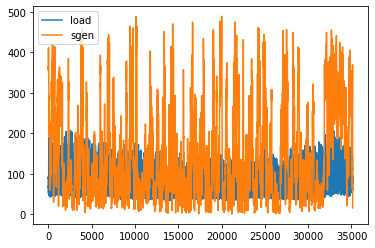

In [6]:
import matplotlib.pyplot as plt
load_p.sum(axis=1).plot(label="load")
sgen_p.sum(axis=1).plot(label="sgen")
plt.legend()
plt.show()

In [7]:
import pandapower.timeseries as ts
from pandapower.control.controller.const_control import ConstControl
from pandapower.timeseries.data_sources.frame_data import DFData

In [10]:
ds=DFData(sgen_p)
ConstControl(net, "sgen", "p_mw", element_index=net.sgen.index, profile_name=sgen_p.columns, data_source=ds)
ds=DFData(load_p)
ConstControl(net, "load", "p_mw", element_index=net.load.index, profile_name=load_p.columns, data_source=ds)
ds=DFData(load_q)
ConstControl(net, "load", "p_mw", element_index=net.load.index, profile_name=load_q.columns, data_source=ds)

This ConstControl has the following parameters: 

index:             2
json_excludes:     ['self', '__class__']

In [12]:
ts.OutputWriter(net, output_path="./", output_file_type=".xlsx")
ts.run_time_series.run_timeseries(net)

No time steps to calculate are specified. I'll check the datasource of the first controller for avaiable time steps
100%|███████████████████████████████████████████████████████████████████████████| 35136/35136 [04:41<00:00, 124.82it/s]
